# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## <font color='brown'> 공공데이터 활용 </font>

### Case2. 2020범죄 발생 유형별 분석
>  
> - [범죄통계] 범죄발생지 (지역별)
> - http://www.data.go.kr/dataset/3074462/fileData.do;jsessionid=wIXUEwb7u5qgTUblcWd1qSq-.node20
> - Practice Data : [[Download]](https://github.com/bigpycraft/ds22-jbfg-mc/blob/main/Sect-E/data/_public_data.zip)

#### 데이터분석 미션
> 
> - 과제1 : 범죄발생 대분류/중분류별 건수 집계 
> - 과제2 : 범죄발생현황 건수 시각화

In [1]:
import platform

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

In [2]:
df = pd.read_csv('data/public_crime_stat_2020.csv', encoding='EUC-KR')
df.head()

,범죄대분류,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,...,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
0,강력범죄,살인기수,67,20,13,17,11,8,12,2,...,1,0,2,4,7,2,0,11,7,30
1,강력범죄,살인미수등,96,41,23,34,7,16,11,1,...,5,5,6,0,13,2,1,16,4,44
2,강력범죄,강도,274,161,60,103,44,64,29,0,...,1,4,2,13,26,3,4,29,4,65
3,강력범죄,강간,969,383,216,304,216,181,132,3,...,10,12,35,63,85,11,14,64,18,328
4,강력범죄,유사강간,118,24,21,35,17,14,10,1,...,1,1,3,1,8,1,1,12,0,33


In [4]:
cirme_sum = pd.DataFrame(df.sum(axis=1), columns = ['계'])
cirme_sum

,계
0,365
1,564
2,1446
3,5151
4,518
5,15059
6,558
7,1673
8,245853
9,48005


In [6]:
crime_df = df.join(cirme_sum)
crime_df.head()

,범죄대분류,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,...,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외,계
0,강력범죄,살인기수,67,20,13,17,11,8,12,2,...,0,2,4,7,2,0,11,7,30,365
1,강력범죄,살인미수등,96,41,23,34,7,16,11,1,...,5,6,0,13,2,1,16,4,44,564
2,강력범죄,강도,274,161,60,103,44,64,29,0,...,4,2,13,26,3,4,29,4,65,1446
3,강력범죄,강간,969,383,216,304,216,181,132,3,...,12,35,63,85,11,14,64,18,328,5151
4,강력범죄,유사강간,118,24,21,35,17,14,10,1,...,1,3,1,8,1,1,12,0,33,518


In [7]:
df = crime_df[['범죄대분류', '범죄중분류', '계']]
df

,범죄대분류,범죄중분류,계
0,강력범죄,살인기수,365
1,강력범죄,살인미수등,564
2,강력범죄,강도,1446
3,강력범죄,강간,5151
4,강력범죄,유사강간,518
5,강력범죄,강제추행,15059
6,강력범죄,기타강간강제추행등,558
7,강력범죄,방화,1673
8,절도범죄,절도,245853
9,폭력범죄,상해,48005


In [2]:
# df = pd.read_csv('data/public_crime_stat_2020.csv', encoding='EUC-KR')
# df.head()

,범죄대분류,범죄중분류,계,서울,부산,대구,인천,광주,대전,울산,...,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
0,강력범죄,살인기수,365,67,20,13,17,11,8,12,...,1,0,2,4,7,2,0,11,7,30
1,강력범죄,살인미수등,564,96,41,23,34,7,16,11,...,5,5,6,0,13,2,1,16,4,44
2,강력범죄,강도,1446,274,161,60,103,44,64,29,...,1,4,2,13,26,3,4,29,4,65
3,강력범죄,강간,5151,969,383,216,304,216,181,132,...,10,12,35,63,85,11,14,64,18,328
4,강력범죄,유사강간,518,118,24,21,35,17,14,10,...,1,1,3,1,8,1,1,12,0,33


In [9]:
df['범죄대분류']

0       강력범죄
1       강력범죄
2       강력범죄
3       강력범죄
4       강력범죄
5       강력범죄
6       강력범죄
7       강력범죄
8       절도범죄
9       폭력범죄
10      폭력범죄
11      폭력범죄
12      폭력범죄
13      폭력범죄
14      폭력범죄
15      폭력범죄
16      폭력범죄
17      지능범죄
18      지능범죄
19      지능범죄
20      지능범죄
21      지능범죄
22      지능범죄
23      지능범죄
24      지능범죄
25      지능범죄
26      풍속범죄
27      풍속범죄
28    특별경제범죄
29      마약범죄
30      보건범죄
31      환경범죄
32      교통범죄
33      노동범죄
34      안보범죄
35      선거범죄
36      병역범죄
37      기타범죄
Name: 범죄대분류, dtype: object

In [10]:
df['범죄중분류']

0          살인기수
1         살인미수등
2            강도
3            강간
4          유사강간
5          강제추행
6     기타강간강제추행등
7            방화
8            절도
9            상해
10           폭행
11         체포감금
12           협박
13         약취유인
14        폭력행위등
15           공갈
16           손괴
17         직무유기
18         직권남용
19          증수뢰
20           통화
21         문서인장
22       유가증권인지
23           사기
24           횡령
25           배임
26        성풍속범죄
27         도박범죄
28       특별경제범죄
29         마약범죄
30         보건범죄
31         환경범죄
32         교통범죄
33         노동범죄
34         안보범죄
35         선거범죄
36         병역범죄
37         기타범죄
Name: 범죄중분류, dtype: object

#### <font color='blue'> # 범죄중분류 별 건수 </font>

In [11]:
df_index = pd.Series(df['계'].values, index=df['범죄중분류'].values)
df_index

살인기수            365
살인미수등           564
강도             1446
강간             5151
유사강간            518
강제추행          15059
기타강간강제추행등       558
방화             1673
절도           245853
상해            48005
폭행           149278
체포감금           1028
협박             9187
약취유인            190
폭력행위등         35686
공갈             3596
손괴            58977
직무유기            507
직권남용            401
증수뢰             247
통화             1822
문서인장          14546
유가증권인지          282
사기           247293
횡령            46734
배임             4289
성풍속범죄         16219
도박범죄           8272
특별경제범죄        86329
마약범죄           6411
보건범죄          14602
환경범죄           2955
교통범죄         596665
노동범죄           1145
안보범죄            121
선거범죄            760
병역범죄          18726
기타범죄         216197
dtype: int64

In [12]:
df_index.values

array([   365,    564,   1446,   5151,    518,  15059,    558,   1673,
       245853,  48005, 149278,   1028,   9187,    190,  35686,   3596,
        58977,    507,    401,    247,   1822,  14546,    282, 247293,
        46734,   4289,  16219,   8272,  86329,   6411,  14602,   2955,
       596665,   1145,    121,    760,  18726, 216197], dtype=int64)

<font color='green'> 
> [Note] 
* 값안에 콤마(,)가 있다는 의미는 숫자가 아니라 문자란 말이다. 
* 따라서 그대로 하면 연산이 안된다. 변환이 필요하다.

In [13]:
df_index.values[2]

1446

In [15]:
# int(df_index.values[2].replace(',', ''))

#### <font color='blue'> # 문자열을 정수형으로 변환 </font>

In [18]:
# for n in np.arange(len(df_index)):
#     df_index.values[n] = int(df_index.values[n].replace(',', ''))

In [19]:
df_index.values

array([   365,    564,   1446,   5151,    518,  15059,    558,   1673,
       245853,  48005, 149278,   1028,   9187,    190,  35686,   3596,
        58977,    507,    401,    247,   1822,  14546,    282, 247293,
        46734,   4289,  16219,   8272,  86329,   6411,  14602,   2955,
       596665,   1145,    121,    760,  18726, 216197], dtype=int64)

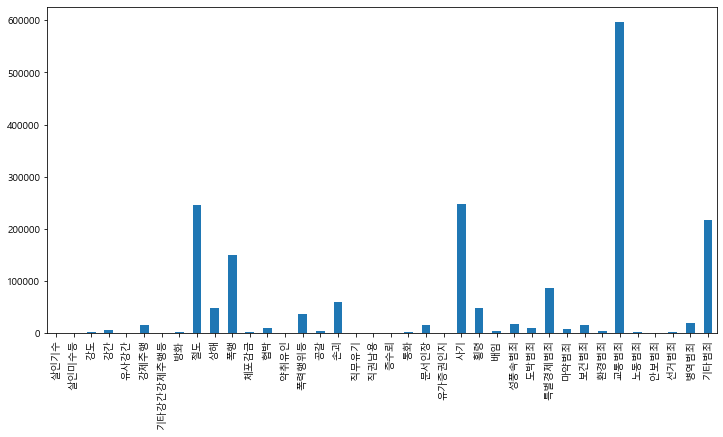

In [20]:
df_index.plot(kind='bar')

In [21]:
plt.rcParams["figure.figsize"] = [14,10]


#### <font color='blue'> # 범죄대분류 별 건수 </font>

In [22]:
df_crime = pd.Series(df['계'].values, index=df['범죄대분류'].values)
df_crime

강력범죄         365
강력범죄         564
강력범죄        1446
강력범죄        5151
강력범죄         518
강력범죄       15059
강력범죄         558
강력범죄        1673
절도범죄      245853
폭력범죄       48005
폭력범죄      149278
폭력범죄        1028
폭력범죄        9187
폭력범죄         190
폭력범죄       35686
폭력범죄        3596
폭력범죄       58977
지능범죄         507
지능범죄         401
지능범죄         247
지능범죄        1822
지능범죄       14546
지능범죄         282
지능범죄      247293
지능범죄       46734
지능범죄        4289
풍속범죄       16219
풍속범죄        8272
특별경제범죄     86329
마약범죄        6411
보건범죄       14602
환경범죄        2955
교통범죄      596665
노동범죄        1145
안보범죄         121
선거범죄         760
병역범죄       18726
기타범죄      216197
dtype: int64

In [23]:
def get_crime_cnt(d_frame):
    crime_cnt = {}
    for idx in range(len(d_frame.index)):
        # print(idx, d_frame.index[idx], d_frame[idx], end="  \t =>")
        # print(idx, crime_cnt)

        crime = d_frame.index[idx]
        count  = d_frame[idx]

        if crime_cnt.get(crime):
            crime_cnt[crime] += count
        else:
            crime_cnt[crime] = count
    
    return crime_cnt
    
crime_dict = get_crime_cnt(df_crime)
crime_dict

{'강력범죄': 25334,
 '절도범죄': 245853,
 '폭력범죄': 305947,
 '지능범죄': 316121,
 '풍속범죄': 24491,
 '특별경제범죄': 86329,
 '마약범죄': 6411,
 '보건범죄': 14602,
 '환경범죄': 2955,
 '교통범죄': 596665,
 '노동범죄': 1145,
 '안보범죄': 121,
 '선거범죄': 760,
 '병역범죄': 18726,
 '기타범죄': 216197}

In [24]:
crime_stat = Series(crime_dict)
crime_stat.name = "범죄발생수"
crime_stat

강력범죄       25334
절도범죄      245853
폭력범죄      305947
지능범죄      316121
풍속범죄       24491
특별경제범죄     86329
마약범죄        6411
보건범죄       14602
환경범죄        2955
교통범죄      596665
노동범죄        1145
안보범죄         121
선거범죄         760
병역범죄       18726
기타범죄      216197
Name: 범죄발생수, dtype: int64

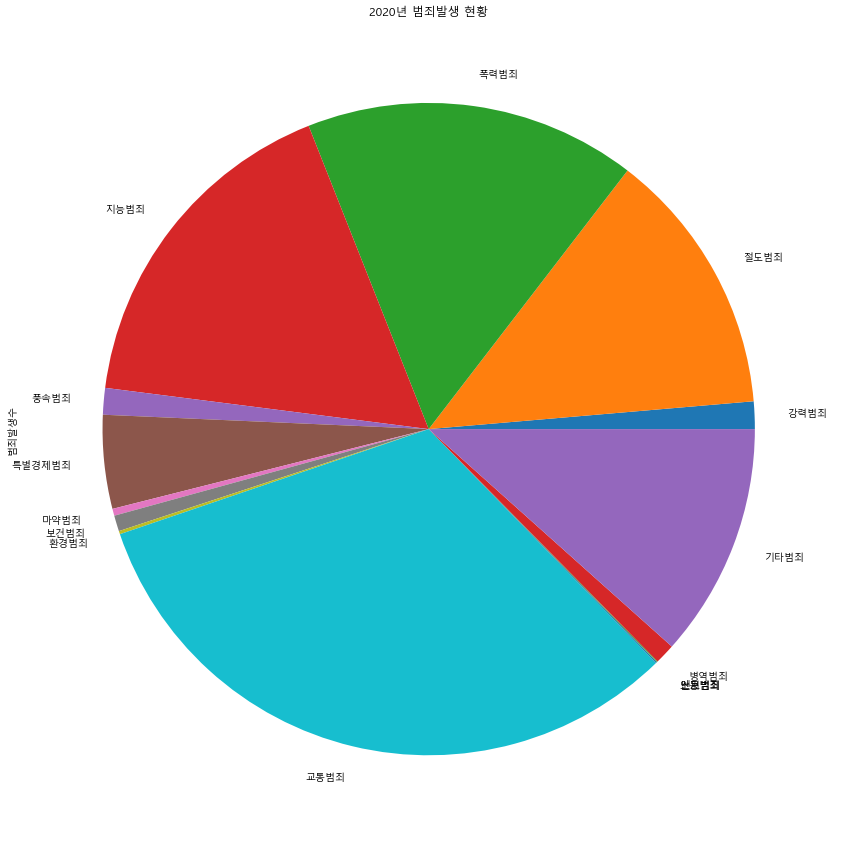

In [26]:
plt.rcParams["figure.figsize"] = [15,15]
# crime_stat.plot(kind='pie');
crime_stat.plot(kind='pie', title='2020년 범죄발생 현황');

#### <font color='blue'> # Seaborn을 사용한 데이터 시각화 </font>
> 
> - Matplotlib을 기반으로 다양한 색상 테마와 통계용 챠트 등의 기능을 추가한 시각화 패키지 
> - http://seaborn.pydata.org/index.html

In [27]:
import seaborn as sns
sns.set()

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [28]:
# df_index.sort_values().head(10)
df_index.sort_values(ascending=False).head(10)

교통범죄      596665
사기        247293
절도        245853
기타범죄      216197
폭행        149278
특별경제범죄     86329
손괴         58977
상해         48005
횡령         46734
폭력행위등      35686
dtype: int64

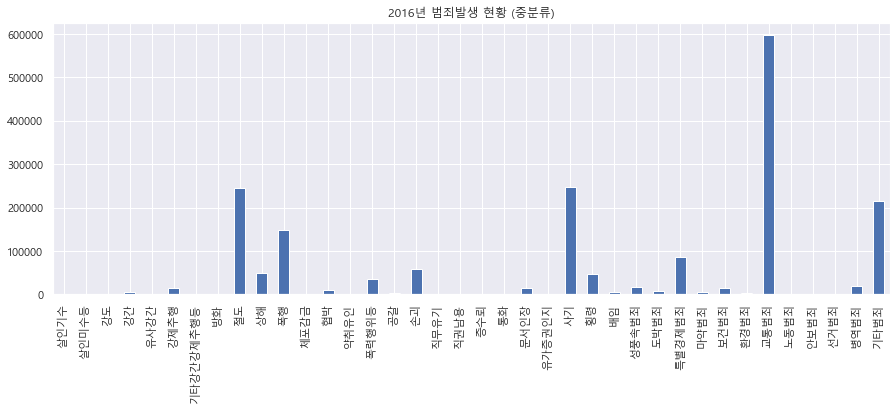

In [29]:
plt.rcParams["figure.figsize"] = [15, 5]
df_index.plot(kind='bar', title='2020년 범죄발생 현황 (중분류)');

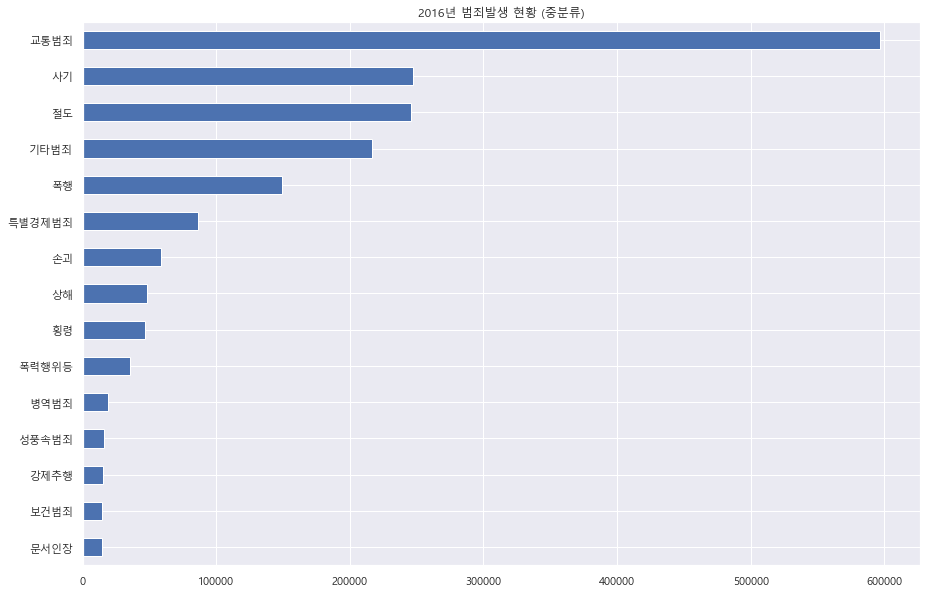

In [30]:
plt.rcParams["figure.figsize"] = [15,10]
# df_index.plot(kind='barh', title='2020년 범죄발생 현황 (중분류)');
df_index.sort_values(ascending=True).tail(15).plot(kind='barh', title='2020년 범죄발생 현황 (중분류)');

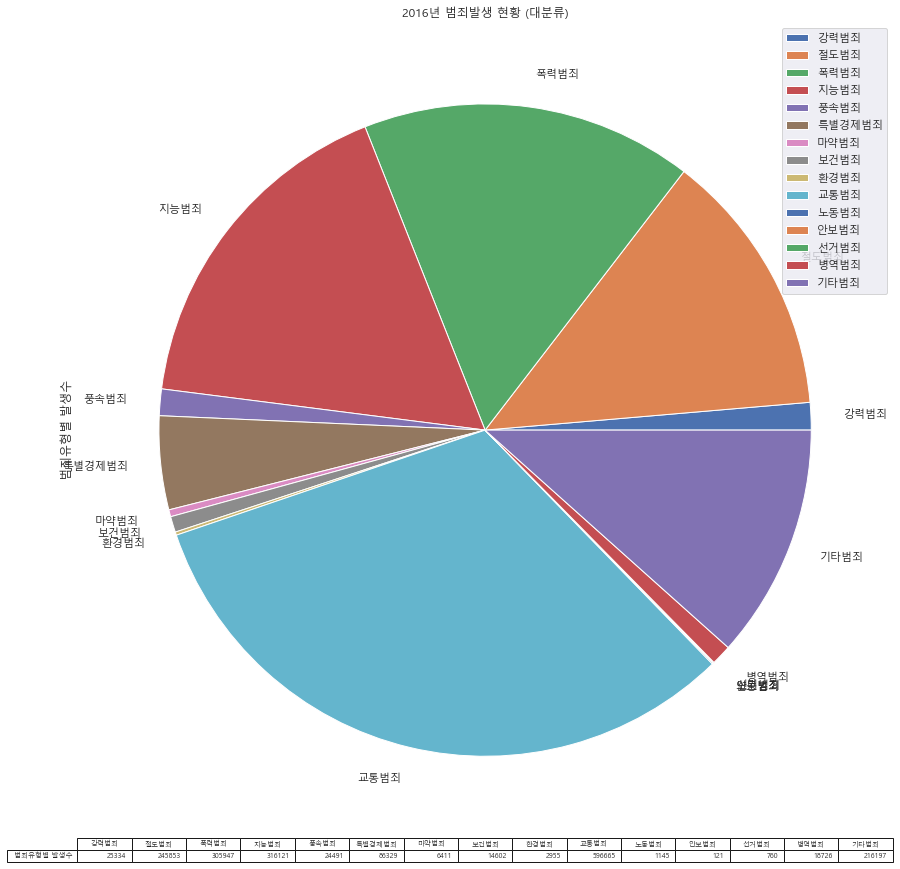

In [31]:
plt.rcParams["figure.figsize"] = [15,15]
crime_stat.plot(kind='pie', title='2020년 범죄발생 현황 (대분류)', label='범죄유형별 발생수', legend=True, table=True);

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>